In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
%matplotlib inline


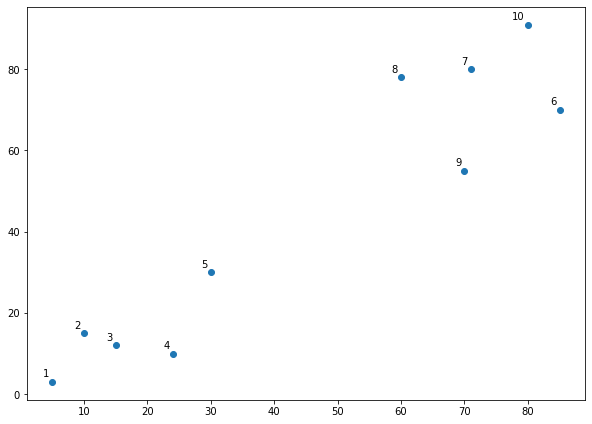

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

## Dendrogrammes en clustering hiérarchique

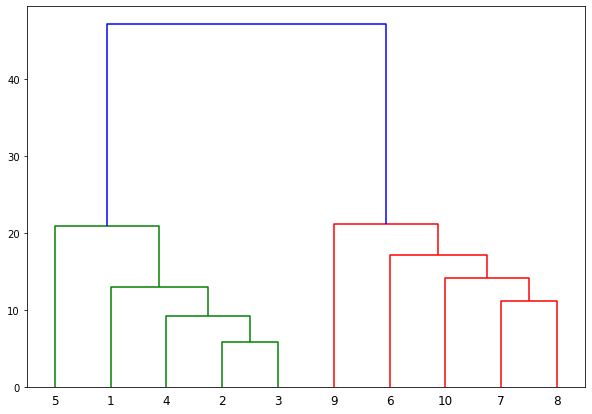

In [5]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [6]:
linked

array([[ 1.        ,  2.        ,  5.83095189,  2.        ],
       [ 3.        , 10.        ,  9.21954446,  3.        ],
       [ 6.        ,  7.        , 11.18033989,  2.        ],
       [ 0.        , 11.        , 13.        ,  4.        ],
       [ 9.        , 12.        , 14.2126704 ,  3.        ],
       [ 5.        , 14.        , 17.20465053,  4.        ],
       [ 4.        , 13.        , 20.88061302,  5.        ],
       [ 8.        , 15.        , 21.21320344,  5.        ],
       [16.        , 17.        , 47.16990566, 10.        ]])

Explanation on linked data shape and interpretation
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html?highlight=linkage#scipy.cluster.hierarchy.linkage

https://stackoverflow.com/questions/9838861/scipy-linkage-format

Explanation on dendrogram: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

## Hierarchical Clustering via Scikit-Learn

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


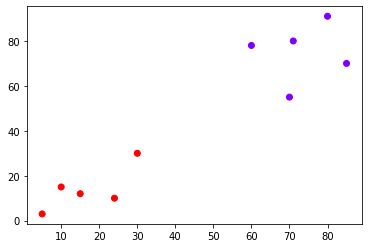

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap="rainbow");

## Exemple sur les données du monde réel

Le problème que nous allons résoudre est de segmenter les clients en différents groupes en fonction de leurs tendances d'achat. L'ensemble de données pour ce problème peut être téléchargé à partir du lien suivant:


https://drive.google.com/file/d/1a2ho7lwqvXLrYB8sZyC8pKQbF7ZoHlBz/view?usp=sharing


In [14]:
data = pd.read_csv("datasets/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv")

In [15]:
data.shape

(200, 5)

In [16]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# prendre income et spending score

X = data.iloc[:, -2:].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

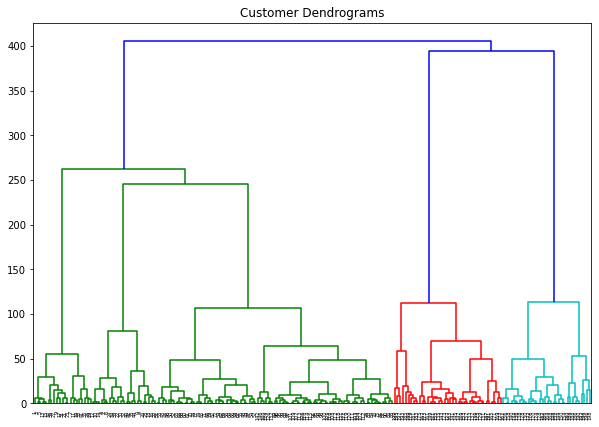

In [20]:
# même chose que ci dessus

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method="ward"))

In [22]:
# 5 clusters grâce au dendrogramme

cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage='ward')
cluster.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

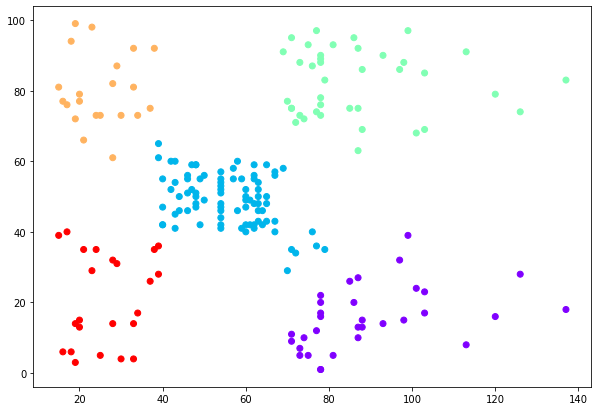

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow');
